Training Score:0.991091
Testing Score:0.980000


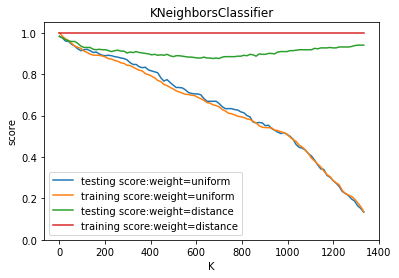

In [2]:
# -*- coding: utf-8 -*-
"""
    kNN和降维
    ~~~~~~~~~~

    KNN分类和回归模型

    :copyright: (c) 2016 by the huaxz1986.
    :license: lgpl-3.0, see LICENSE for more details.
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets,cross_validation

def load_classification_data():
    '''
    加载分类模型使用的数据集。

    :return: 一个元组，依次为：训练样本集、测试样本集、训练样本的标记、测试样本的标记
    '''
    digits=datasets.load_digits() # 使用 scikit-learn 自带的手写识别数据集 Digit Dataset
    X_train=digits.data
    y_train=digits.target
    return cross_validation.train_test_split(X_train, y_train,test_size=0.25,
            random_state=0,stratify=y_train) # 进行分层采样拆分，测试集大小占 1/4
def test_KNeighborsClassifier(*data):
    '''
    测试 KNeighborsClassifier 的用法

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的标记、测试样本的标记
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    clf=neighbors.KNeighborsClassifier()
    clf.fit(X_train,y_train)
    print("Training Score:%f"%clf.score(X_train,y_train))
    print("Testing Score:%f"%clf.score(X_test,y_test))
def test_KNeighborsClassifier_k_w(*data):
    '''
    测试 KNeighborsClassifier 中 n_neighbors 和 weights 参数的影响

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的标记、测试样本的标记
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    Ks=np.linspace(1,y_train.size,num=100,endpoint=False,dtype='int')
    weights=['uniform','distance']

    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ### 绘制不同 weights 下， 预测得分随 n_neighbors 的曲线
    for weight in weights:
        training_scores=[]
        testing_scores=[]
        for K in Ks:
            clf=neighbors.KNeighborsClassifier(weights=weight,n_neighbors=K)
            clf.fit(X_train,y_train)
            testing_scores.append(clf.score(X_test,y_test))
            training_scores.append(clf.score(X_train,y_train))
        ax.plot(Ks,testing_scores,label="testing score:weight=%s"%weight)
        ax.plot(Ks,training_scores,label="training score:weight=%s"%weight)
    ax.legend(loc='best')
    ax.set_xlabel("K")
    ax.set_ylabel("score")
    ax.set_ylim(0,1.05)
    ax.set_title("KNeighborsClassifier")
    plt.show()
def test_KNeighborsClassifier_k_p(*data):
    '''
    测试 KNeighborsClassifier 中 n_neighbors 和 p 参数的影响

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的标记、测试样本的标记
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    Ks=np.linspace(1,y_train.size,endpoint=False,dtype='int')
    Ps=[1,2,10]

    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ### 绘制不同 p 下， 预测得分随 n_neighbors 的曲线
    for P in Ps:
        training_scores=[]
        testing_scores=[]
        for K in Ks:
            clf=neighbors.KNeighborsClassifier(p=P,n_neighbors=K)
            clf.fit(X_train,y_train)
            testing_scores.append(clf.score(X_test,y_test))
            training_scores.append(clf.score(X_train,y_train))
        ax.plot(Ks,testing_scores,label="testing score:p=%d"%P)
        ax.plot(Ks,training_scores,label="training score:p=%d"%P)
    ax.legend(loc='best')
    ax.set_xlabel("K")
    ax.set_ylabel("score")
    ax.set_ylim(0,1.05)
    ax.set_title("KNeighborsClassifier")
    plt.show()

if __name__=='__main__':
    X_train,X_test,y_train,y_test=load_classification_data() # 获取分类模型的数据集
    test_KNeighborsClassifier(X_train,X_test,y_train,y_test) # 调用 test_KNeighborsClassifier
    test_KNeighborsClassifier_k_w(X_train,X_test,y_train,y_test)# 调用 test_KNeighborsClassifier_k_w
    #test_KNeighborsClassifier_k_p(X_train,X_test,y_train,y_test)# 调用 test_KNeighborsClassifier_k_p